<a href="https://colab.research.google.com/github/Arpitha-317/gdp-dashboard/blob/main/numericalsolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%cd /content/drive/MyDrive/Solar_panel_IFD/

/content/drive/MyDrive/numericalsolar_data


In [ ]:
#"G:\My Drive\Solar_panel_IFD"

In [21]:
import os
print(os.listdir('/content/drive/MyDrive/Solar_panel_IFD'))

['F2M.mat', 'F5M.mat', 'F3L.mat', 'F7L.mat', 'F4L.mat', 'F4M.mat', 'F1L.mat', 'F6L.mat', 'F2L.mat', 'F1M.mat', 'F0L.mat', 'F7M.mat', 'ReadMe.pdf', 'F3M.mat', 'F6M.mat', 'F0M.mat', 'F5L.mat', 'CSV_Files', 'PreProcessed Data']


In [24]:
df1 = pd.read_csv('/content/drive/MyDrive/Solar_panel_IFD/PreProcessed Data/Max_solar_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Solar_panel_IFD/PreProcessed Data/Lim_solar_data.csv')

df = pd.concat([df1,df2], ignore_index=True, axis=0)
df = df.iloc[:,1:] # Take the time column out
df

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1.000000,50.000000,1.000000,50.000000,F0M
1,2.378357,90.368652,148.242188,-0.678956,0.570679,0.047847,148.546906,-119.881439,-24.723663,1.000000,50.000000,1.000000,50.000000,F0M
2,2.373627,90.460205,148.535156,0.603393,-0.537109,-0.187139,-145.027008,120.315399,26.109924,1.000000,50.000000,1.000000,50.000000,F0M
3,2.368896,90.423584,148.242188,-0.685670,0.570679,0.041133,147.341461,-119.736786,-26.105906,0.440380,50.078491,118.275197,49.921509,F0M
4,2.362274,90.435791,148.242188,0.630248,-0.523682,-0.166997,-143.279114,120.942230,26.680501,0.618996,50.248673,90.022162,49.606494,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,1.531647,102.056885,142.675781,0.354979,-0.503540,0.148555,-108.381500,152.585144,-40.760091,0.519110,50.036816,155.672324,49.999645,F7L
21632,1.565704,101.104736,143.261719,-0.403687,0.523682,-0.126714,110.756226,-149.559479,43.311615,0.519713,50.087054,155.706972,49.992937,F7L
21633,1.501373,101.556396,142.968750,0.361693,-0.530396,0.182124,-108.803406,152.319946,-40.470785,0.522856,50.138598,155.636851,49.996147,F7L
21634,1.492859,100.970459,143.847656,-0.396974,0.537109,-0.106572,110.720062,-150.451508,42.560221,0.525012,49.932554,155.571019,50.008771,F7L


In [25]:
scaler=StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])

In [26]:
df

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.979735,0.100169,0.313577,1.391768,-0.857034,-0.220780,-1.196860,1.032965,0.279438,0.780398,0.095092,-24.688949,0.016969,F0M
1,0.993837,0.097543,0.324291,-1.424348,0.909961,0.112665,1.204111,-1.043958,-0.288110,0.780398,0.095092,-24.688949,0.016969,F0M
2,0.986003,0.101482,0.335005,1.362585,-0.867809,-0.263805,-1.188901,1.033486,0.285239,0.780398,0.095092,-24.688949,0.016969,F0M
3,0.978168,0.099906,0.324291,-1.438939,0.909961,0.101908,1.194285,-1.042707,-0.303700,-0.223435,0.116185,-5.896742,-3.778340,F0M
4,0.967200,0.100432,0.324291,1.420950,-0.846260,-0.231536,-1.174653,1.038908,0.291675,0.096962,0.161919,-10.424015,-19.010500,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,-0.408546,0.600375,0.120725,0.822708,-0.813937,0.274009,-0.890192,1.312585,-0.468984,-0.082210,0.104985,0.095783,-0.000179,F7L
21632,-0.352137,0.559413,0.142153,-0.826106,0.834540,-0.166999,0.896067,-1.300641,0.479256,-0.081129,0.118486,0.101335,-0.324573,F7L
21633,-0.458687,0.578843,0.131439,0.837299,-0.857034,0.327790,-0.893631,1.310291,-0.465721,-0.075491,0.132338,0.090099,-0.169323,F7L
21634,-0.472789,0.553636,0.163581,-0.811514,0.856089,-0.134730,0.895773,-1.308356,0.470781,-0.071624,0.076966,0.079550,0.441069,F7L


In [27]:
win_len  = 10
stride = 1

In [28]:
df_temp=df[df['label']=='F0M']

In [29]:
df_temp

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.979735,0.100169,0.313577,1.391768,-0.857034,-0.220780,-1.196860,1.032965,0.279438,0.780398,0.095092,-24.688949,0.016969,F0M
1,0.993837,0.097543,0.324291,-1.424348,0.909961,0.112665,1.204111,-1.043958,-0.288110,0.780398,0.095092,-24.688949,0.016969,F0M
2,0.986003,0.101482,0.335005,1.362585,-0.867809,-0.263805,-1.188901,1.033486,0.285239,0.780398,0.095092,-24.688949,0.016969,F0M
3,0.978168,0.099906,0.324291,-1.438939,0.909961,0.101908,1.194285,-1.042707,-0.303700,-0.223435,0.116185,-5.896742,-3.778340,F0M
4,0.967200,0.100432,0.324291,1.420950,-0.846260,-0.231536,-1.174653,1.038908,0.291675,0.096962,0.161919,-10.424015,-19.010500,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,0.644417,0.127214,0.270721,1.158307,-1.126393,0.241740,-0.889799,1.319674,-0.466355,0.291560,0.093851,0.085752,0.313944,F0M
1407,0.664786,0.130103,0.270721,-1.103340,1.211643,-0.392881,0.907269,-1.291571,0.503820,0.294454,0.077690,0.089229,-0.044963,F0M
1408,0.738431,0.097806,0.302863,1.114534,-1.147942,0.241740,-0.877516,1.320300,-0.467760,0.289405,0.105481,0.122722,0.167357,F0M
1409,0.910791,0.094392,0.270721,-1.088749,1.211643,-0.414393,0.902454,-1.290424,0.505044,0.289383,0.096021,0.115834,-0.388128,F0M


In [30]:
X=[]
Y=[]


i=0
X.append(df_temp.iloc[i:i+win_len,:-1])
Y.append(df_temp.iloc[i+win_len,-1])

X,Y

([        Ipv       Vpv       Vdc        ia        ib        ic        va  \
  0  0.979735  0.100169  0.313577  1.391768 -0.857034 -0.220780 -1.196860   
  1  0.993837  0.097543  0.324291 -1.424348  0.909961  0.112665  1.204111   
  2  0.986003  0.101482  0.335005  1.362585 -0.867809 -0.263805 -1.188901   
  3  0.978168  0.099906  0.324291 -1.438939  0.909961  0.101908  1.194285   
  4  0.967200  0.100432  0.324291  1.420950 -0.846260 -0.231536 -1.174653   
  5  1.003239  0.103583  0.324291 -1.438939  0.909961  0.101908  1.202146   
  6  0.971900  0.139293  0.324291  1.420950 -0.846260 -0.220780 -1.174948   
  7  0.960932  0.084415  0.324291 -1.453530  0.909961  0.091152  1.201851   
  8  0.993837  0.074699  0.335005  1.406359 -0.857034 -0.220780 -1.176716   
  9  0.976601  0.075750  0.324291 -1.468122  0.931510  0.091152  1.202047   
  
           vb        vc      Iabc        If       Vabc         Vf  
  0  1.032965  0.279438  0.780398  0.095092 -24.688949   0.016969  
  1 -1.043958 

In [31]:
np.arange(0,len(df_temp)-(win_len),1)

array([   0,    1,    2, ..., 1398, 1399, 1400])

In [32]:
win_len=100

X=[]
Y=[]

for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])


In [33]:
X=np.array(X)
X.shape

(1311, 100, 13)

In [34]:
df['label'].unique()

array(['F0M', 'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M', 'F0L',
       'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L'], dtype=object)

In [35]:
X=[]
Y=[]

no_classes = len(df['label'].unique())

for k in ['M','L']:

    for j in range(0,8):
        df_temp=df[df['label']=='F{}{}'.format(j,k)]

        for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])

X=np.array(X)
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [36]:
Y[0]

np.str_('F0M')

In [37]:
encoded_Y[0]

np.int64(1)

In [38]:
OHE_Y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, OHE_Y, test_size=0.2, random_state=42)
X_test.shape

(4008, 100, 13, 1)

In [41]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(20, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((20, 2),strides=(5, 5),padding='same'))

cnn_model.add(Conv2D(64, (10, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(10, 2),strides=(3, 3),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))

# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))


cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 13, 32)    │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 3, 64)      │        61,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,992 (480.44 KB)

 Trainable params: 122,992 (480.44 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
batch_size = 400
epochs = 10
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/10
41/41 - 58s - 1s/step - accuracy: 0.6615 - loss: 1.2269 - val_accuracy: 0.9149 - val_loss: 0.2820
Epoch 2/10
41/41 - 50s - 1s/step - accuracy: 0.9444 - loss: 0.1696 - val_accuracy: 0.9474 - val_loss: 0.1260
Epoch 3/10
41/41 - 50s - 1s/step - accuracy: 0.9754 - loss: 0.0767 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 4/10
41/41 - 48s - 1s/step - accuracy: 0.9898 - loss: 0.0444 - val_accuracy: 0.9985 - val_loss: 0.0235
Epoch 5/10
41/41 - 82s - 2s/step - accuracy: 0.9971 - loss: 0.0206 - val_accuracy: 0.9998 - val_loss: 0.0163
Epoch 6/10
41/41 - 49s - 1s/step - accuracy: 0.9994 - loss: 0.0135 - val_accuracy: 0.9998 - val_loss: 0.0083
Epoch 7/10
41/41 - 83s - 2s/step - accuracy: 0.9999 - loss: 0.0071 - val_accuracy: 0.9998 - val_loss: 0.0088
Epoch 8/10
41/41 - 50s - 1s/step - accuracy: 0.9999 - loss: 0.0058 - val_accuracy: 0.9998 - val_loss: 0.0057
Epoch 9/10
41/41 - 48s - 1s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9998 - val_loss: 0.0033
Epoch 10/10
41/41 -

In [51]:
cnn_model.save(r'/content/drive/MyDrive/Solar_panel_IFD/Trained_model/CNN_model_solar.h5')
# To save in the recommended native Keras format, you could use:
# cnn_model.save(r'/content/drive/MyDrive/Solar_panel_IFD/Trained_model/CNN_model_solar.keras')

In [45]:
from tensorflow.keras.models import load_model
cnn_model = load_model(r'/content/drive/MyDrive/Solar_panel_IFD\Trained_model\CNN_model_solar.h5')

126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step


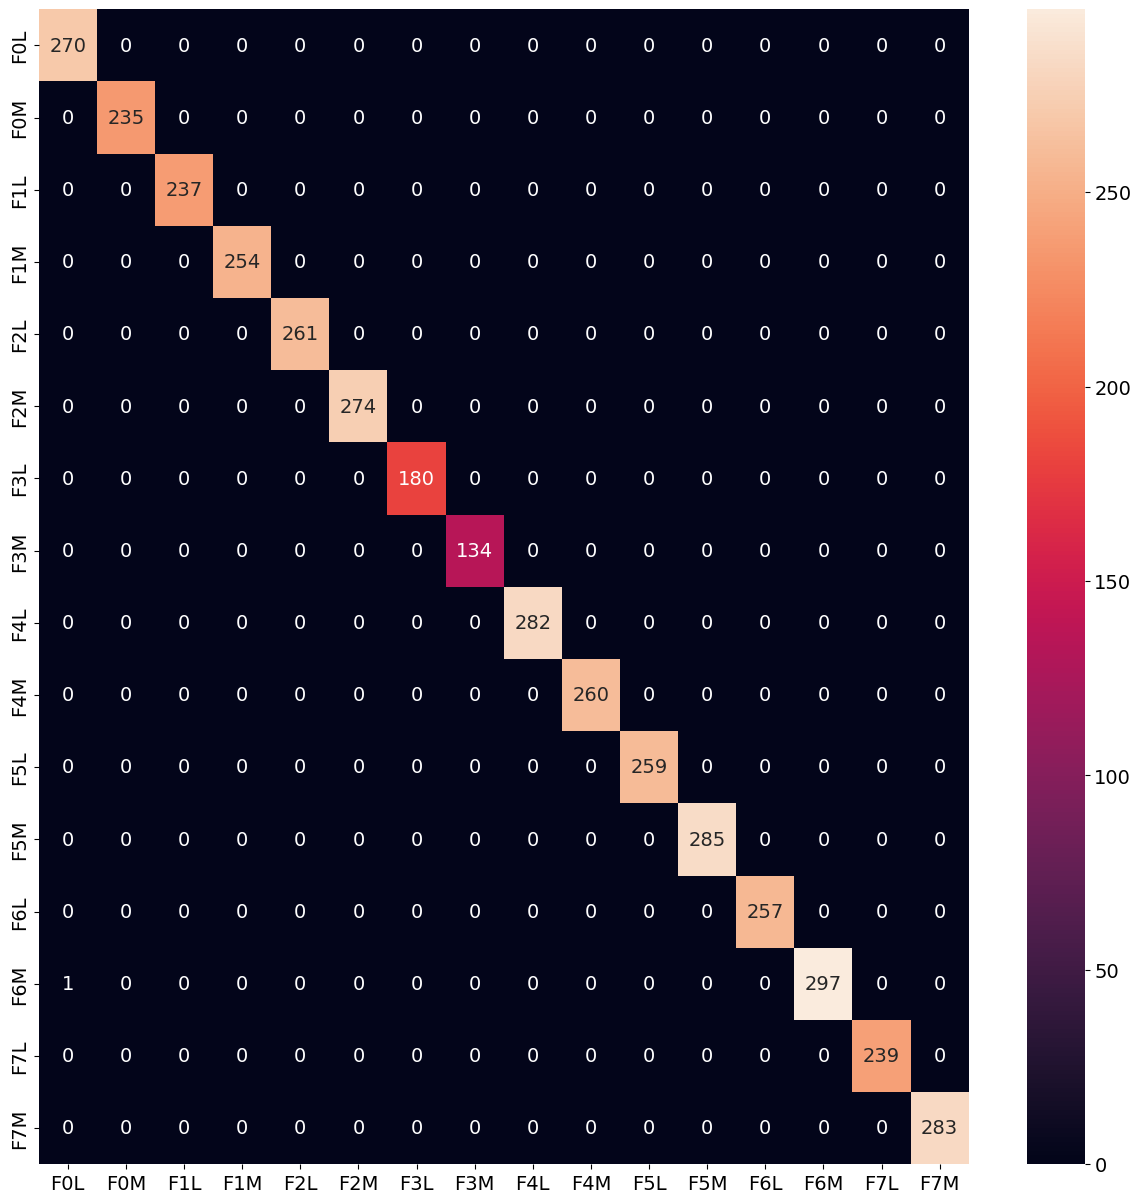

In [47]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(15,15))
cm = confusion_matrix(Y_test, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

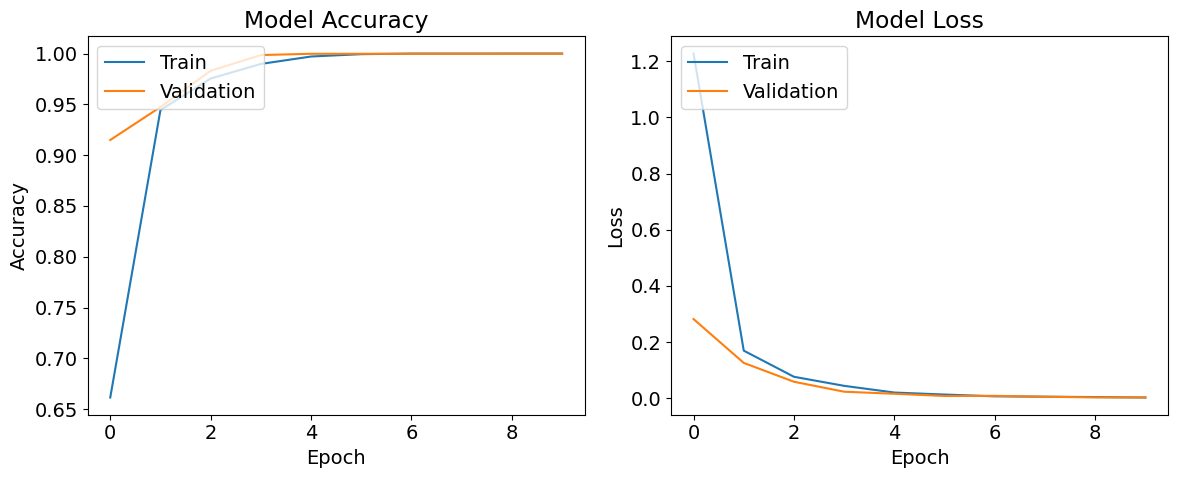

In [48]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(Y_test, Y_pred, target_names=encoder.classes_, output_dict=True)

# Convert to DataFrame for easier plotting
df_report = pd.DataFrame(report).transpose()

# Exclude 'accuracy', 'macro avg', 'weighted avg' for class-specific plots
df_class_metrics = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])

df_class_metrics.index.name = 'Class'
df_class_metrics = df_class_metrics.reset_index()

display(df_class_metrics)

,Class,precision,recall,f1-score,support
0,F0L,0.99631,1.000000,0.998152,270.0
1,F0M,1.00000,1.000000,1.000000,235.0
2,F1L,1.00000,1.000000,1.000000,237.0
3,F1M,1.00000,1.000000,1.000000,254.0
4,F2L,1.00000,1.000000,1.000000,261.0
5,F2M,1.00000,1.000000,1.000000,274.0
6,F3L,1.00000,1.000000,1.000000,180.0
7,F3M,1.00000,1.000000,1.000000,134.0
8,F4L,1.00000,1.000000,1.000000,282.0
9,F4M,1.00000,1.000000,1.000000,260.0


/tmp/ipython-input-3999054646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='precision', data=df_class_metrics, palette='viridis')
/tmp/ipython-input-3999054646.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='recall', data=df_class_metrics, palette='viridis')
/tmp/ipython-input-3999054646.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='f1-score', data=df_class_metrics, palette='viridis')


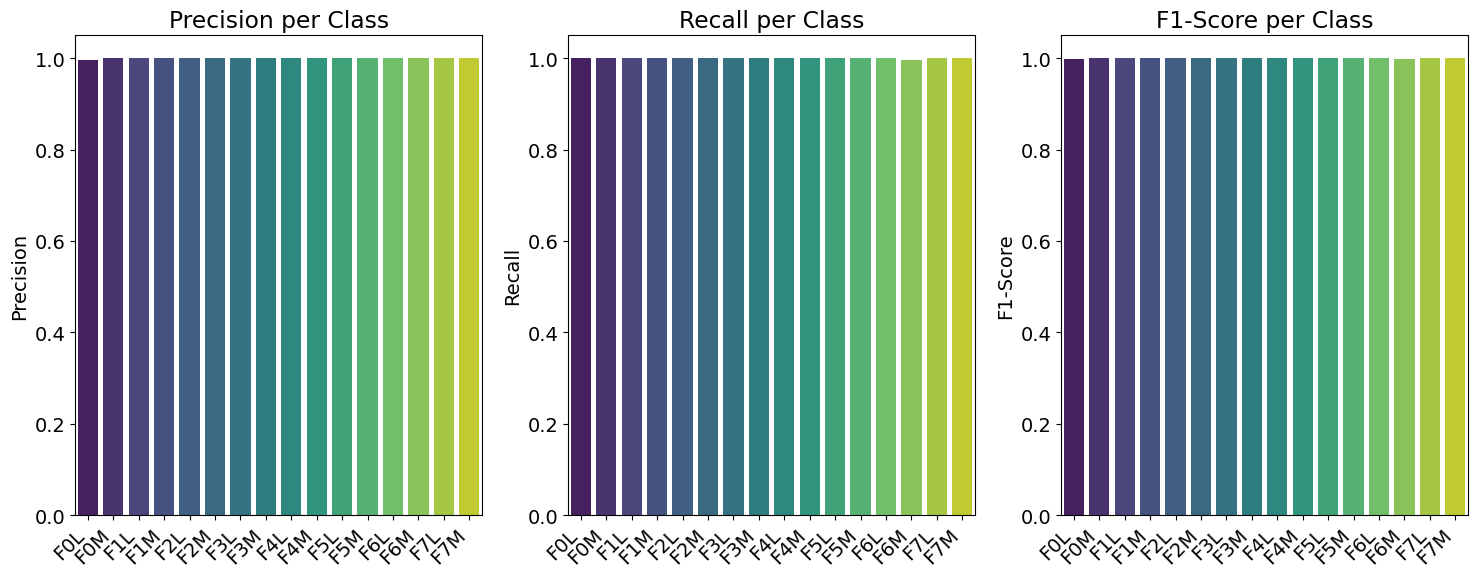

In [50]:
plt.figure(figsize=(15, 6))

# Plot Precision
plt.subplot(1, 3, 1)
sns.barplot(x='Class', y='precision', data=df_class_metrics, palette='viridis')
plt.title('Precision per Class')
plt.ylabel('Precision')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)

# Plot Recall
plt.subplot(1, 3, 2)
sns.barplot(x='Class', y='recall', data=df_class_metrics, palette='viridis')
plt.title('Recall per Class')
plt.ylabel('Recall')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)

# Plot F1-Score
plt.subplot(1, 3, 3)
sns.barplot(x='Class', y='f1-score', data=df_class_metrics, palette='viridis')
plt.title('F1-Score per Class')
plt.ylabel('F1-Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()